<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 7 (midnight), 2024 -->

# Project 1 on Machine Learning, deadline October 7 (midnight), 2024
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **September 2**

### Part g): Analysis of real data

With our codes functioning and having been tested properly on a
simpler function we are now ready to look at real data. We will
essentially repeat in this exercise what was done in exercises a-f. However, we
need first to download the data and prepare properly the inputs to our
codes.  We are going to download digital terrain data from the website
<https://earthexplorer.usgs.gov/>,

Or, if you prefer, we have placed selected datafiles at <https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects/2023/Project1/DataFiles>

In order to obtain data for a specific region, you need to register as
a user (free) at this website and then decide upon which area you want
to fetch the digital terrain data from.  In order to be able to read
the data properly, you need to specify that the format should be **SRTM
Arc-Second Global** and download the data as a **GeoTIF** file.  The
files are then stored in *tif* format which can be imported into a
Python program using

In [2]:
# scipy.misc.imread

Here is a simple part of a Python code which reads and plots the data
from such files

In [3]:
# pip install tifffile
# !pip install imagecodecs
# !pip install pillow
# !pip install imageio

If you should have problems in downloading the digital terrain data,
we provide two examples under the data folder of project 1. One is
from a region close to Stavanger in Norway and the other Møsvatn
Austfjell, again in Norway.
Feel free to produce your own terrain data.

Alternatively, if you would like to use another data set, feel free to do so. This could be data close to your reseach area or simply a data set you found interesting. See for example [kaggle.com](https://www.kaggle.com/datasets) for examples.

Our final part deals with the parameterization of your digital terrain
data (or your own data).  We will apply all three methods for linear regression, the same type (or higher order) of polynomial
approximation and cross-validation as resampling technique to evaluate which
model fits the data best.

At the end, you should present a critical evaluation of your results
and discuss the applicability of these regression methods to the type
of data presented here (either the terrain data we propose or other data sets).

In [1]:
# Linear algebra and numerical operations
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from imageio import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

# Random number generation
from random import random, seed

# Warnings
import warnings
warnings.filterwarnings("ignore")

from scipy.ndimage import zoom

### OLS

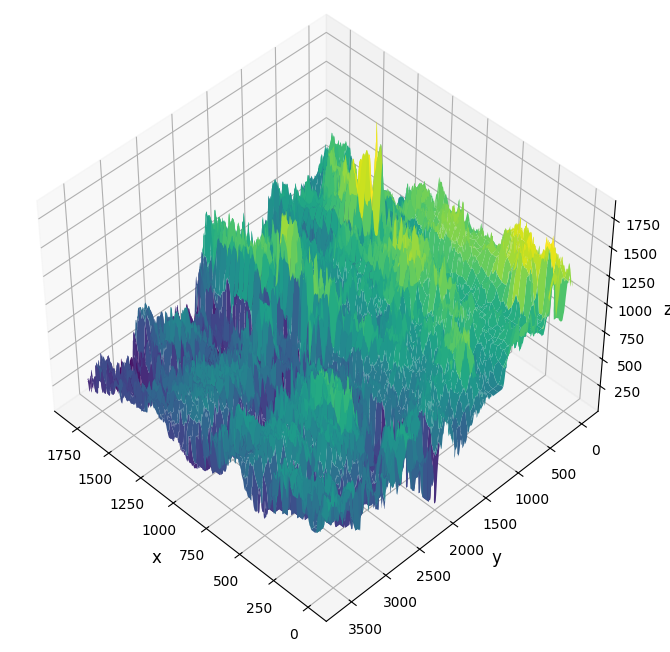

In [2]:
terrain1 = imread('Raw_Data/SRTM_data_Norway_1.tif')
n, m = terrain1.shape

smooth_factor = 2
terrain_smooth = zoom(terrain1, smooth_factor)

n_smooth, m_smooth = terrain_smooth.shape
x = np.linspace(0, m - 1, m_smooth)
y = np.linspace(0, n - 1, n_smooth)
x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 
surface = ax.plot_surface(x, y, terrain_smooth, cmap='viridis', edgecolor='none', antialiased=True)
# fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5, label='Elevation')

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
# ax.set_title(f'Smooth 3D Surface Plot of Terrain 1, smooth: {smooth_factor}, shape: {terrain1.shape}', fontsize=14)
ax.view_init(elev=45, azim=135)

# Show plot
plt.show()

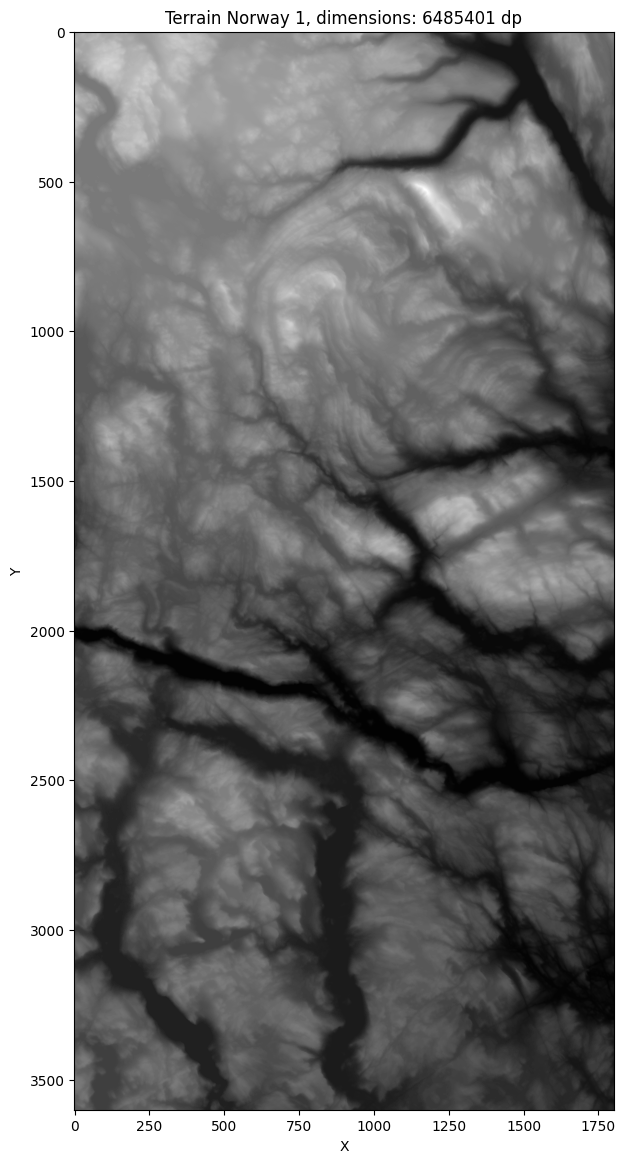

In [4]:
# Load the terrain data
terrain1 = imread('Raw_Data/SRTM_data_Norway_1.tif')
n, m = terrain1.shape

# Create the image plot
plt.figure(figsize=(10, 14))

plt.imshow(terrain1, cmap='gray')
plt.title(f'Terrain Norway 1, dimensions: {n*m} dp')
plt.xlabel('X')
plt.ylabel('Y')
# plt.axis('equal')
# lt.colorbar(label='Elevation')
# plt.savefig('terrain1_prm.pdf', format='pdf')

plt.show()

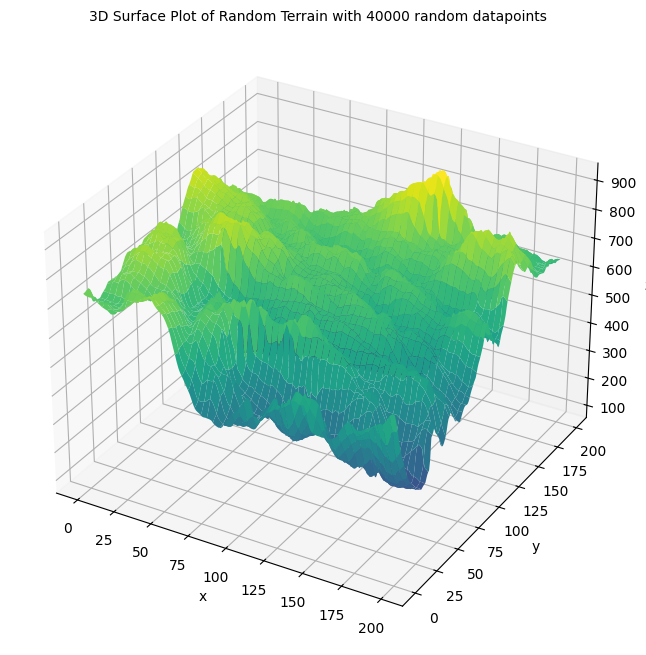

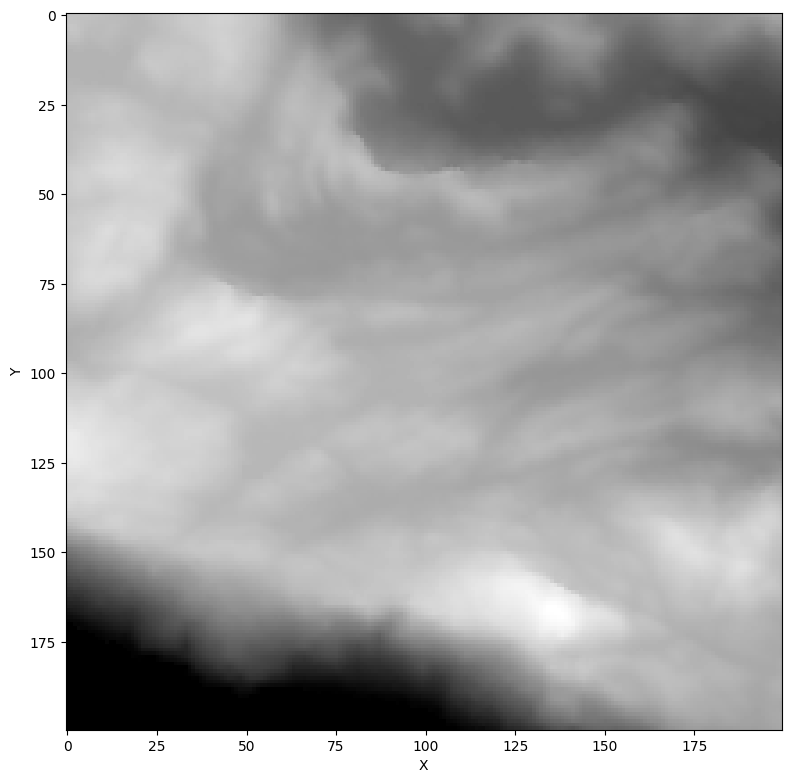

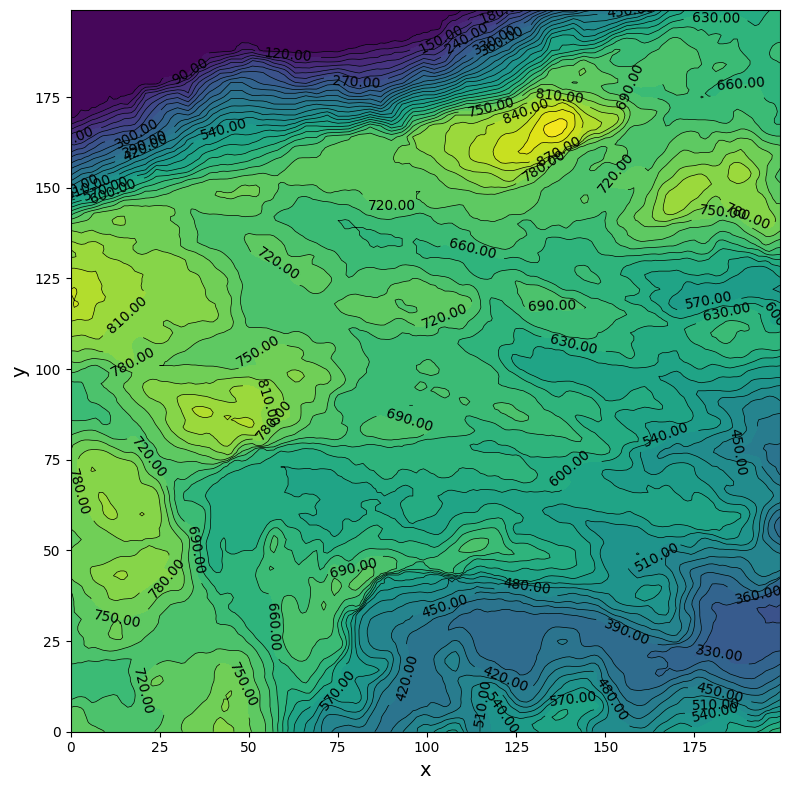

In [6]:
np.random.seed(234)
terrain1 = imread('Raw_Data/SRTM_data_Norway_1.tif')
n, m = terrain1.shape

# Sample size
sample_size = 200

# Generate random starting coordinates ensuring the sample fits within the image
start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)

# Extract a random 20x20 sample
terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]
x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

# Create the figure and 3D axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot 3D surafce
surface = ax.plot_surface(x_sample, y_sample, terrain_sample, cmap='viridis', edgecolor='none')
# fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5, label='Elevation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(f'3D Surface Plot of Random Terrain with {sample_size*sample_size} random datapoints', fontsize = 10)

# Plot the parametrized data
plt.figure(figsize=(8, 8), dpi = 100)
plt.imshow(terrain_sample, cmap='gray')
# plt.colorbar(label='Elevation')
# plt.title(f'Parametrized Terrain with {sample_size*sample_size} random datapoints', fontsize = 10)
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()

# Plot Contour
fig, ax = plt.subplots(figsize=(8,8), dpi = 100)
contour = ax.contourf(x_sample, y_sample, terrain_sample, levels=30, cmap=cm.viridis)
contour_lines = ax.contour(x_sample, y_sample, terrain_sample, levels=30, colors='black', linewidths=0.5)
ax.clabel(contour_lines, inline=True, fontsize=10, fmt="%.2f")
# ax.set_title(f'Contour Plot of Terrain with {sample_size*sample_size} random datapoints', fontsize=10)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
# cbar = fig.colorbar(contour, ax=ax)
# cbar.ax.tick_params(labelsize=12)


# plt.savefig('terrain_random_sample_plot.pdf', format='pdf')
plt.tight_layout()
plt.show()

In [7]:
# fig, ax = plt.subplots(figsize=(8,12))
# contour = ax.contourf(x, y, terrain_smooth, levels=30, cmap=cm.gray)

# # contour lines on top of the filled contours
# contour_lines = ax.contour(x, y, terrain_smooth, levels=30, colors='black', linewidths=0.5)

# # contour labels
# # ax.clabel(contour_lines, inline=True, fontsize=10, fmt="%.2f")
# # ax.set_title(f'Terrain 1, {n}x{m} data points.', fontsize=14)
# ax.set_xlabel('x', fontsize=14)
# ax.set_ylabel('y', fontsize=14)

# # ax.grid(True, linestyle='--', alpha=0.6)

# # cbar = fig.colorbar(contour, ax=ax)
# # cbar.ax.tick_params(labelsize=12)

# # plt.savefig('terrain1_plot_full.pdf', format='pdf')
# plt.tight_layout()
# plt.show()

In [8]:
# TRAIN TEST ON TERRAIN DATA
np.random.seed(234)
n, m = terrain1.shape

sample_size = 200     # --> MODIFY THIS FOR TESTING
max_degree = 30           # ––> MODIFY THIS FOR TESTING

start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)

terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]

# meshgrid
x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

X = np.column_stack((x_sample.ravel(), y_sample.ravel()))
terrain_target = terrain_sample.ravel()

mse_train_values = []
mse_test_values = []
r2_train_values = []
r2_test_values = []

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, terrain_target, test_size=0.2, random_state=10)

for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    r2_train_values.append(r2_train)
    r2_test_values.append(r2_test)

    # Print metrics
    print(f"Degree: {degree} \t Train MSE: {mse_train:.4f} \t Test MSE: {mse_test:.4f} \t Train R²: {r2_train:.4f} \t Test R²: {r2_test:.4f}")

# PLOT
sns.set_theme(style="white")

# MSE Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), mse_train_values, label='Train MSE', color='tab:blue', linewidth=2)
plt.plot(range(1, max_degree + 1), mse_test_values, label='Test MSE', linestyle='--', color='tab:orange', linewidth=2)
plt.xlabel('Degree of Polynomial', fontsize=16)
plt.ylabel('log(MSE)', fontsize=16)
plt.xticks(ticks=range(1, max_degree + 1))
plt.title(f'MSE vs. degree of polynomial, sample size = {sample_size}, max degree = {max_degree}', fontsize=12)
plt.yscale('log')
plt.legend()
plt.show()

# R² Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), r2_train_values, label='Train R²', color='tab:green', linewidth=2)
plt.plot(range(1, max_degree + 1), r2_test_values, label='Test R²', linestyle='--', color='tab:red', linewidth=2)
plt.xlabel(f'Degree of Polynomial', fontsize=16)
plt.ylabel('R²', fontsize=16)
plt.ylim(0, 1)
plt.xticks(ticks=range(1, max_degree + 1))
plt.title(f'R2 vs. degree of polynomial, sample size = {sample_size}, max degree = {max_degree}', fontsize=12)
plt.legend()
plt.show()

Degree: 1 	 MSE: 30984.2703 	 R²: 0.0176
Degree: 2 	 MSE: 12180.2685 	 R²: 0.6138
Degree: 3 	 MSE: 5890.1651 	 R²: 0.8133
Degree: 4 	 MSE: 5184.9499 	 R²: 0.8356
Degree: 5 	 MSE: 4966.5637 	 R²: 0.8425
Degree: 6 	 MSE: 3011.2466 	 R²: 0.9045
Degree: 7 	 MSE: 2696.4182 	 R²: 0.9145
Degree: 8 	 MSE: 2801.7426 	 R²: 0.9112
Degree: 9 	 MSE: 2266.2655 	 R²: 0.9281
Degree: 10 	 MSE: 4387.3293 	 R²: 0.8609
Degree: 11 	 MSE: 2859.6618 	 R²: 0.9093
Degree: 12 	 MSE: 2294.3495 	 R²: 0.9273
Degree: 13 	 MSE: 2415.5665 	 R²: 0.9234
Degree: 14 	 MSE: 2811.0847 	 R²: 0.9109
Degree: 15 	 MSE: 3000.2007 	 R²: 0.9049
Degree: 16 	 MSE: 12840.5551 	 R²: 0.5929
Degree: 17 	 MSE: 4572.0016 	 R²: 0.8550
Degree: 18 	 MSE: 3828.3785 	 R²: 0.8786
Degree: 19 	 MSE: 13121.4613 	 R²: 0.5840
Degree: 20 	 MSE: 4895.2840 	 R²: 0.8448
Degree: 21 	 MSE: 13731.5830 	 R²: 0.5646
Degree: 22 	 MSE: 4879.4983 	 R²: 0.8453
Degree: 23 	 MSE: 5271.3320 	 R²: 0.8329
Degree: 24 	 MSE: 11691.7614 	 R²: 0.6293
Degree: 25 	 MSE: 6

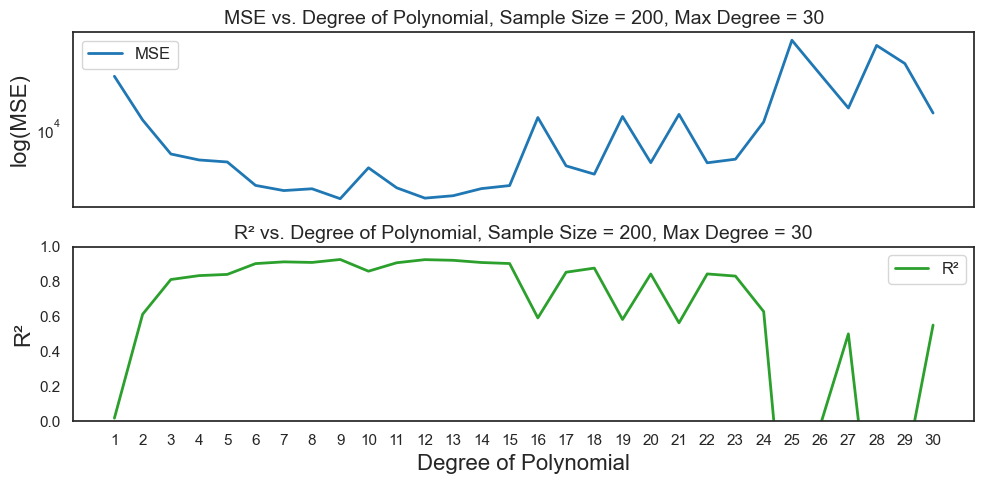

In [9]:
# Set random seed and sample size
np.random.seed(234)
n, m = terrain1.shape
sample_size = 200     # --> MODIFY THIS FOR TESTING
max_degree = 30       # --> MODIFY THIS FOR TESTING

# Select a random sample from the terrain data
start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)
terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]

# Create meshgrid for the sample
x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

# Reshape the sample into feature matrix and target vector
X = np.column_stack((x_sample.ravel(), y_sample.ravel()))
terrain_target = terrain_sample.ravel()

# Lists to store the metrics for different polynomial degrees
mse_values = []
r2_values = []

# Loop over polynomial degrees and fit model
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    # Train the model using the complete dataset
    model = LinearRegression()
    model.fit(X_poly, terrain_target)

    # Predictions using the complete dataset
    y_pred = model.predict(X_poly)

    # Metrics
    mse = mean_squared_error(terrain_target, y_pred)
    r2 = r2_score(terrain_target, y_pred)

    mse_values.append(mse)
    r2_values.append(r2)

    print(f"Degree: {degree} \t MSE: {mse:.4f} \t R²: {r2:.4f}")

# Find the degree with the highest R² and the lowest MSE
best_degree_r2 = np.argmax(r2_values) + 1  # +1 to match degree range starting at 1
best_degree_mse = np.argmin(mse_values) + 1

print(f"\nBest Degree based on Maximum R²: {best_degree_r2} with R² = {max(r2_values):.4f}")
print(f"Best Degree based on Minimum MSE: {best_degree_mse} with MSE = {min(mse_values):.4f}")

if best_degree_r2 == best_degree_mse:
    best_degree = best_degree_r2
else:
    best_degree = best_degree_mse  # Prioritize minimizing MSE

print(f"\nOptimal Degree (Balanced): {best_degree}")

# PLOT
sns.set_theme(style="white")

# Creazione di un'unica figura con due subplot uno sopra l'altro
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), dpi=100, sharex=True)

# Plot per MSE
ax1.plot(range(1, max_degree + 1), mse_values, label='MSE', color='tab:blue', linewidth=2)
ax1.set_ylabel('log(MSE)', fontsize=16)
ax1.set_title(f'MSE vs. Degree of Polynomial, Sample Size = {sample_size}, Max Degree = {max_degree}', fontsize=14)
ax1.set_yscale('log')  # Scala logaritmica per l'asse y
ax1.legend(fontsize=12)

# Plot per R²
ax2.plot(range(1, max_degree + 1), r2_values, label='R²', color='tab:green', linewidth=2)
ax2.set_xlabel('Degree of Polynomial', fontsize=16)
ax2.set_ylabel('R²', fontsize=16)
ax2.set_ylim(0, 1)
ax2.set_title(f'R² vs. Degree of Polynomial, Sample Size = {sample_size}, Max Degree = {max_degree}', fontsize=14)
ax2.legend(fontsize=12)
ax2.set_xticks(range(1, max_degree + 1))

plt.tight_layout()
plt.show()

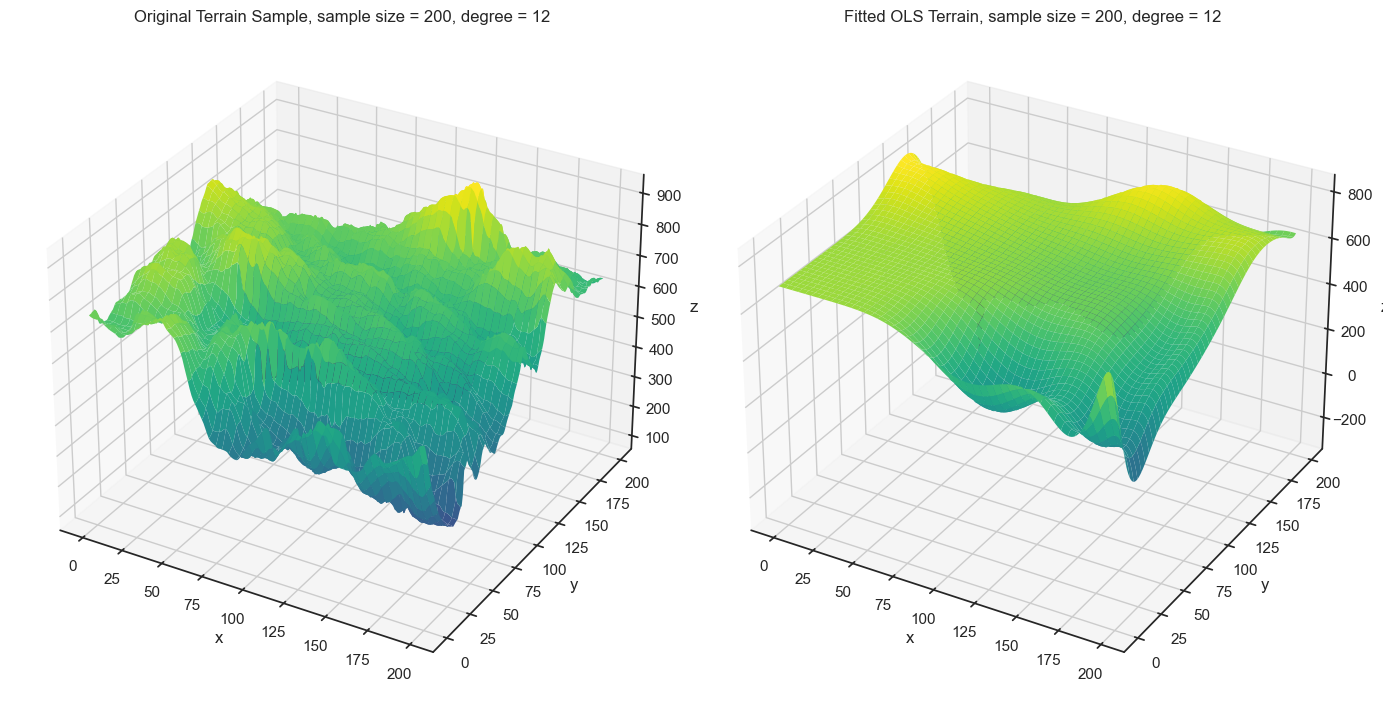

MSE 2294.3495490363894
R2 0.9272568577247575


In [10]:
np.random.seed(234)
n, m = terrain1.shape

sample_size = 200        # --> MODIFY THIS FOR TESTING
degree = 12           # ––> MODIFY THIS FOR TESTING

start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)

terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]

x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

x_flat = x_sample.ravel()
y_flat = y_sample.ravel()
z_flat = terrain_sample.ravel()

X = np.column_stack((x_flat, y_flat))

poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Create and fit the model
model = LinearRegression()
model.fit(X_poly, z_flat)

# Predictions
z_pred = model.predict(X_poly)
MSE_OLS = mean_squared_error(z_flat, z_pred)
R2_OLS = r2_score(z_flat, z_pred)

# Reshape the predictions
z_pred_reshaped = z_pred.reshape(terrain_sample.shape)

fig = plt.figure(figsize=(14, 7))

# Original Terrain Plot
ax1 = fig.add_subplot(121, projection='3d')
surface1 = ax1.plot_surface(x_sample, y_sample, terrain_sample, cmap='viridis', edgecolor='none')
ax1.set_title(f'Original Terrain Sample, sample size = {sample_size}, degree = {degree}')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
# fig.colorbar(surface1, ax=ax1, shrink=0.5, aspect=5, label='Elevation')

# Fitted Terrain Plot
ax2 = fig.add_subplot(122, projection='3d')
surface2 = ax2.plot_surface(x_sample, y_sample, z_pred_reshaped, cmap='viridis', edgecolor='none')
ax2.set_title(f'Fitted OLS Terrain, sample size = {sample_size}, degree = {degree}')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
# fig.colorbar(surface2, ax=ax2, shrink=0.5, aspect=5, label='Elevation')
plt.tight_layout()
plt.show()

print('MSE', MSE_OLS)
print("R2", R2_OLS)

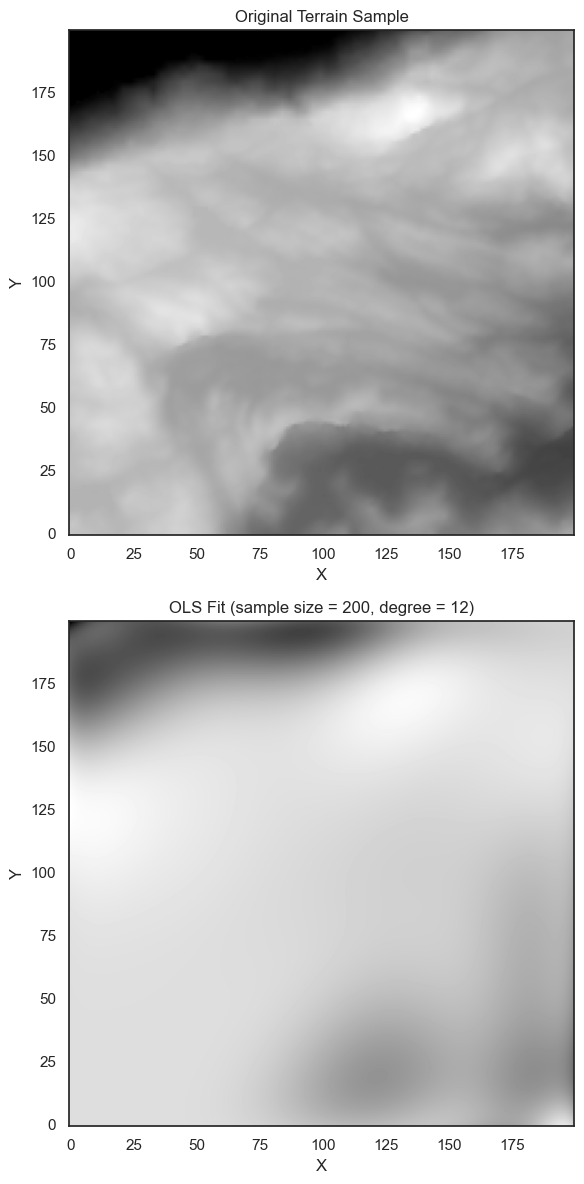

MSE: 2294.3495
R2: 0.9273


In [11]:
# Load the terrain data
terrain1 = imread('Raw_Data/SRTM_data_Norway_1.tif')
n, m = terrain1.shape
np.random.seed(234)

# Parameters for the sample size and polynomial degree
sample_size = 200  # MODIFY THIS FOR TESTING
degree = 12        # MODIFY THIS FOR TESTING

# Extract a random sample from the terrain data
start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)
terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]

# Generate the meshgrid for the sample
x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

# Flatten the meshgrid and sample for regression
x_flat = x_sample.ravel()
y_flat = y_sample.ravel()
z_flat = terrain_sample.ravel()

# Polynomial regression setup
X = np.column_stack((x_flat, y_flat))
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, z_flat)

# Predict using the fitted model
z_pred = model.predict(X_poly)
MSE_OLS = mean_squared_error(z_flat, z_pred)
R2_OLS = r2_score(z_flat, z_pred)

# Reshape the predicted values for plotting
z_pred_sample = z_pred.reshape((sample_size, sample_size))

# Create subplots for the terrain plots
fig, ax = plt.subplots(2, 1, figsize=(6, 12))

# Original Terrain Plot
ax[0].imshow(terrain_sample, cmap='gray', origin='lower')
ax[0].set_title(f'Original Terrain Sample', fontsize=12)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

# Fitted Terrain Plot
ax[1].imshow(z_pred_sample, cmap='gray', origin='lower')
ax[1].set_title(f'OLS Fit (sample size = {sample_size}, degree = {degree})', fontsize=12)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')

# Adjust the layout and show the plots
plt.tight_layout()
# plt.savefig('/Users/gabrieledurante/Desktop/terrain_analysis.pdf')
plt.show()

# Output the metrics
print(f'MSE: {MSE_OLS:.4f}')
print(f"R2: {R2_OLS:.4f}")


### Ridge

When it comes to terrain data, we will implement Ridge regression by exclusively using scikit-learn libraries. This for two main reasons: practicality and efficiency.

In [ ]:
# Load the terrain data
terrain1 = imread('Raw_Data/SRTM_data_Norway_1.tif')
n, m = terrain1.shape
np.random.seed(234)

# Parameters for the sample size and polynomial degree
sample_size = 200  # MODIFY THIS FOR TESTING
# degree = 12        # MODIFY THIS FOR TESTING --> Instead of one single degree
#                                                  we analyze a range of 15 different degrees

# Extract a random sample from the terrain data
start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)
terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]

# Generate the meshgrid for the sample
x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

# Flatten the meshgrid and sample for regression
x_flat = x_sample.ravel()
y_flat = y_sample.ravel()
z_flat = terrain_sample.ravel()

# Define parameters
polynomial_degrees = list(range(1, 16)) # Polynomial degrees from a minimum of 1 to a maximum of 15
nlambdas = 40
lambdas = np.logspace(-10, 10, nlambdas)  # Example range for lambda values

# List to store the different MSE and R2 values
train_mse_values = []
train_r2_values = []
test_mse_values = []
test_r2_values = []
lambda_values = []

for degree in polynomial_degrees:
    print(f'Analyzing degree: {degree}')
    
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(np.column_stack((x_flat, y_flat)))

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_poly, z_flat, test_size=0.2, random_state=42)

    # Hyperparameter tuning with GridSearchCV
    grid_parameter = {'alpha': lambdas}
    ridge_model = Ridge(fit_intercept=True)

    grid_search_cv = GridSearchCV(ridge_model, grid_parameter, cv=5, scoring='neg_mean_squared_error')
    grid_search_cv.fit(X_train, y_train)

    best_lambda = grid_search_cv.best_params_['alpha']
    lambda_values.append(best_lambda)
    print(f"Best lambda for Ridge regression: {best_lambda}") 

    best_model = grid_search_cv.best_estimator_
    y_train_predict = best_model.predict(X_train)
    y_test_predict = best_model.predict(X_test)

    # Calculate final metrics
    final_train_mse = mean_squared_error(y_train, y_train_predict)
    final_test_mse = mean_squared_error(y_test, y_test_predict)
    final_train_r2 = r2_score(y_train, y_train_predict)
    final_test_r2 = r2_score(y_test, y_test_predict)

    train_mse_values.append(final_train_mse)
    test_mse_values.append(final_test_mse)
    train_r2_values.append(final_train_r2)
    test_r2_values.append(final_test_r2)

    print(f'Final Train MSE: {final_train_mse:.4f}')
    print(f'Final Test MSE: {final_test_mse:.4f}')
    print(f'Final Train R2: {final_train_r2:.4f}')
    print(f'Final Test R2: {final_test_r2:.4f}')
    print('-' * 57)

Analyzing degree: 1
Best lambda for Ridge regression: 789652.2868499701
Final Train MSE: 30983.6507
Final Test MSE: 30988.5000
Final Train R2: 0.0177
Final Test R2: 0.0174
---------------------------------------------------------
Analyzing degree: 2
Best lambda for Ridge regression: 661.4740641230132
Final Train MSE: 12117.0812
Final Test MSE: 12434.0934
Final Train R2: 0.6158
Final Test R2: 0.6057
---------------------------------------------------------
Analyzing degree: 3
Best lambda for Ridge regression: 2154.434690031878
Final Train MSE: 5875.9521
Final Test MSE: 5948.4044
Final Train R2: 0.8137
Final Test R2: 0.8114
---------------------------------------------------------
Analyzing degree: 4
Best lambda for Ridge regression: 661.4740641230132
Final Train MSE: 5184.3835
Final Test MSE: 5189.1728
Final Train R2: 0.8356
Final Test R2: 0.8355
---------------------------------------------------------
Analyzing degree: 5
Best lambda for Ridge regression: 203.09176209047305
Final Train

### Lasso

In [7]:
def mse_and_r2_sk(y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    return mse, r2


# We create a function to determine the best lambdas to use
def best_lambdas_Lasso(X_train_val, z_train_val, lambdas):
    X_train, X_validation, z_train, z_validation = train_test_split(X_train_val, z_train_val, test_size=0.1, random_state=10)
    MSE_train_Lasso = []
    MSE_test_Lasso = []
    R2_train_Lasso = []
    R2_test_Lasso = []

    for l in range(len(lambdas)):
        model_Lasso = Lasso(alpha = lambdas[l], fit_intercept=False)
        model_Lasso.fit(X_train, z_train)
        z_train_pred_Lasso_sk = model_Lasso.predict(X_train)
        z_test_pred_Lasso_sk = model_Lasso.predict(X_validation)

        mse_train, r2_train = mse_and_r2_sk(z_train, z_train_pred_Lasso_sk)
        mse_validation, r2_validation = mse_and_r2_sk(z_validation, z_test_pred_Lasso_sk)
        
        MSE_train_Lasso.append(mse_train)
        MSE_test_Lasso.append(mse_validation)
        R2_train_Lasso.append(r2_train)
        R2_test_Lasso.append(r2_validation)

    best_index = np.argmin(MSE_test_Lasso)
    best_alpha = lambdas[best_index]
    min_MSE = MSE_test_Lasso[best_index]
    return best_alpha, min_MSE, MSE_train_Lasso, MSE_test_Lasso, R2_train_Lasso, R2_test_Lasso

Degree: 1 	 Train MSE: 30911.6991 	 Test MSE: 31281.9040 	 Train R²: 0.0170 	 Test R²: 0.0199 	 Alpha: -5.0
Degree: 2 	 Train MSE: 12141.0103 	 Test MSE: 12342.9582 	 Train R²: 0.6139 	 Test R²: 0.6133 	 Alpha: -0.79
Degree: 3 	 Train MSE: 6033.1289 	 Test MSE: 6019.3113 	 Train R²: 0.8081 	 Test R²: 0.8114 	 Alpha: -5.0
Degree: 4 	 Train MSE: 5566.5503 	 Test MSE: 5527.9742 	 Train R²: 0.8230 	 Test R²: 0.8268 	 Alpha: -5.0
Degree: 5 	 Train MSE: 5358.5432 	 Test MSE: 5337.2156 	 Train R²: 0.8296 	 Test R²: 0.8328 	 Alpha: -0.79
Degree: 6 	 Train MSE: 5210.3855 	 Test MSE: 5207.9051 	 Train R²: 0.8343 	 Test R²: 0.8368 	 Alpha: -0.26
Degree: 7 	 Train MSE: 5035.6260 	 Test MSE: 5055.6973 	 Train R²: 0.8399 	 Test R²: 0.8416 	 Alpha: -0.26
Degree: 8 	 Train MSE: 4845.0055 	 Test MSE: 4886.5300 	 Train R²: 0.8459 	 Test R²: 0.8469 	 Alpha: -0.79
Degree: 9 	 Train MSE: 4621.0172 	 Test MSE: 4668.4919 	 Train R²: 0.8531 	 Test R²: 0.8537 	 Alpha: -0.79
Degree: 10 	 Train MSE: 4351.4746 	 

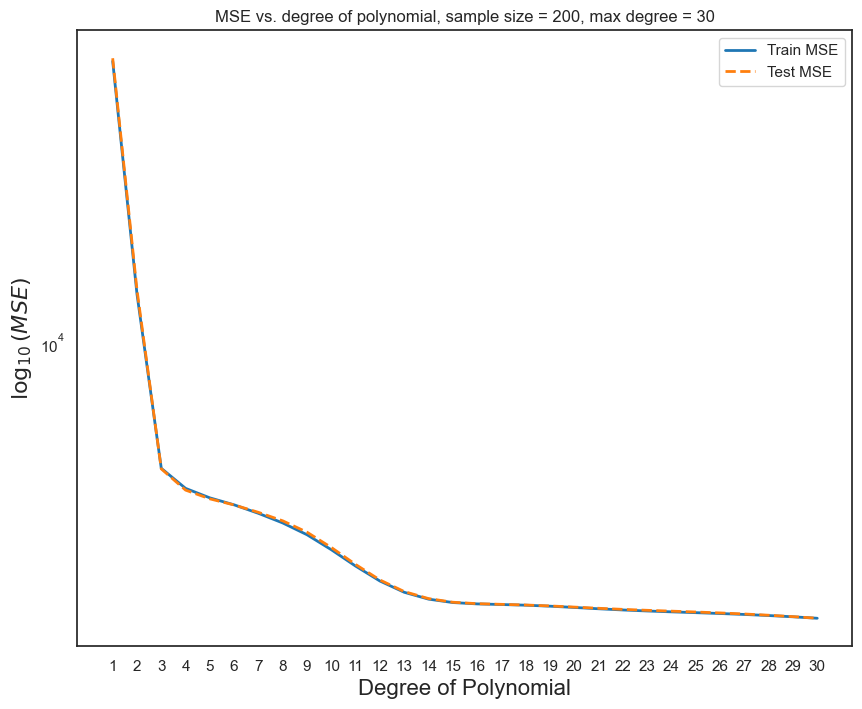

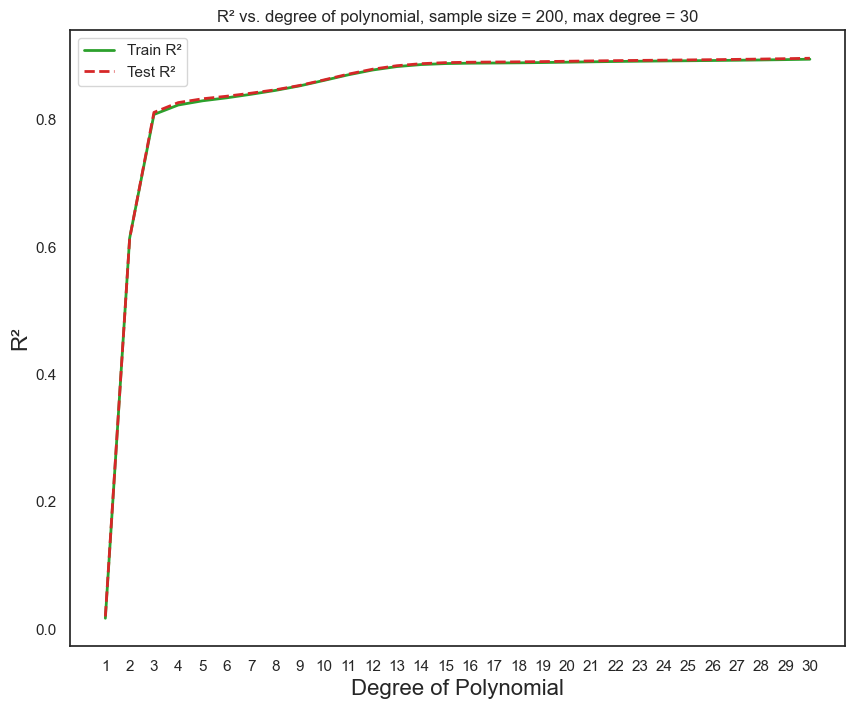

In [16]:
# TRAIN TEST LASSO ON TERRAIN DATA
np.random.seed(234)
n, m = terrain1.shape
lambdas = np.logspace(-5, 5, 20) 

sample_size = 200         # --> MODIFY THIS FOR TESTING
max_degree = 30           # ––> MODIFY THIS FOR TESTING

start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)

terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]

# meshgrid
x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

X = np.column_stack((x_sample.ravel(), y_sample.ravel()))
terrain_target = terrain_sample.ravel()

mse_train_values_Lasso = np.zeros(max_degree)
mse_test_values_Lasso = np.zeros(max_degree)
r2_train_values_Lasso = np.zeros(max_degree)
r2_test_values_Lasso = np.zeros(max_degree)
best_alpha_log_Lasso = np.zeros(max_degree)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, terrain_target, test_size=0.2, random_state=10)

for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    best_alpha, min_MSE, MSE_train_Lasso, MSE_test_Lasso, R2_train__Lasso, R2_test_Lasso = best_lambdas_Lasso(X_train_poly, y_train, lambdas)
    model = Lasso(alpha = best_alpha, fit_intercept=False)
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    mse_train, r2_train = mse_and_r2_sk(y_train, y_train_pred)
    mse_test, r2_test = mse_and_r2_sk(y_test, y_test_pred)
    
    mse_train_values_Lasso[degree - 1] = mse_train
    mse_test_values_Lasso[degree - 1] = mse_test
    r2_train_values_Lasso[degree - 1] = r2_train
    r2_test_values_Lasso[degree - 1] = r2_test
    best_alpha_log_Lasso[degree - 1] = np.log10(best_alpha).round(2)
    
    print(f"Degree: {degree} \t Train MSE: {mse_train_values_Lasso[degree-1]:.4f} \t Test MSE: {mse_test_values_Lasso[degree-1]:.4f} \t Train R²: {r2_train_values_Lasso[degree-1]:.4f} \t Test R²: {r2_test_values_Lasso[degree-1]:.4f} \t Alpha: {best_alpha_log_Lasso[degree-1]}")

best_degree = np.argmin(mse_test_values_Lasso)
alpha = best_alpha_log_Lasso[best_degree]
MSE = mse_test_values_Lasso[best_degree]
print(f"\nThe best combination is obtained with Degree = {best_degree + 1} and an alpha value = {alpha}, we obtain an MSE test of {MSE:.4f}")

# --------------------------------- Plot results ---------------------------------
sns.set_theme(style="white")

# MSE Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), mse_train_values_Lasso, label='Train MSE', color='tab:blue', linewidth=2)
plt.plot(range(1, max_degree + 1), mse_test_values_Lasso, label='Test MSE', linestyle='--', color='tab:orange', linewidth=2)
plt.xlabel('Degree of Polynomial', fontsize=16)
plt.xticks(ticks=range(1, max_degree + 1))
plt.ylabel(r'$\log_{10}(MSE)$', fontsize=16)
plt.yscale('log')
plt.title(f'MSE vs. degree of polynomial, sample size = {sample_size}, max degree = {max_degree}', fontsize=12)
plt.legend()
plt.show()

# R² Train vs Test
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), r2_train_values_Lasso, label='Train R²', color='tab:green', linewidth=2)
plt.plot(range(1, max_degree + 1), r2_test_values_Lasso, label='Test R²', linestyle='--', color='tab:red', linewidth=2)
plt.xlabel(f'Degree of Polynomial', fontsize=16)
plt.xticks(ticks=range(1, max_degree + 1))
plt.ylabel('R²', fontsize=16)
plt.title(f'R² vs. degree of polynomial, sample size = {sample_size}, max degree = {max_degree}', fontsize=12)
plt.legend()
plt.show()

In [8]:
n, m = terrain1.shape
lambdas_1 = np.logspace(-15, 1, 20) 

sample_size = 200         # --> MODIFY THIS FOR TESTING
max_degree = 15           # ––> MODIFY THIS FOR TESTING

start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)

terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]

# meshgrid
x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

X = np.column_stack((x_sample.ravel(), y_sample.ravel()))
terrain_target = terrain_sample.ravel()

mse_train_values_d = np.zeros((max_degree, len(lambdas_1)))
mse_test_values_d = np.zeros((max_degree, len(lambdas_1)))
r2_train_values_d = np.zeros((max_degree, len(lambdas_1)))
r2_test_values_d = np.zeros((max_degree, len(lambdas_1)))
best_alpha_log_Lasso_hm = np.zeros(max_degree)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, terrain_target, test_size=0.2, random_state=10)
# Loop iteration
for l in range(len(lambdas_1)):
    for degree in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree = degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        model_d = Lasso(alpha = lambdas_1[l], fit_intercept=False)
        model_d.fit(X_train_poly, y_train)
        y_train_pred = model_d.predict(X_train_poly)
        y_test_pred = model_d.predict(X_test_poly)
        
        mse_train, r2_train = mse_and_r2_sk(y_train, y_train_pred)
        mse_test, r2_test = mse_and_r2_sk(y_test, y_test_pred)
        
        mse_train_values_d[degree - 1, l] = mse_train
        mse_test_values_d[degree - 1, l] = mse_test
        r2_train_values_d[degree - 1, l] = r2_train
        r2_test_values_d[degree - 1, l] = r2_test
        
        lambdas_labels = np.log10(lambdas_1).round(2)

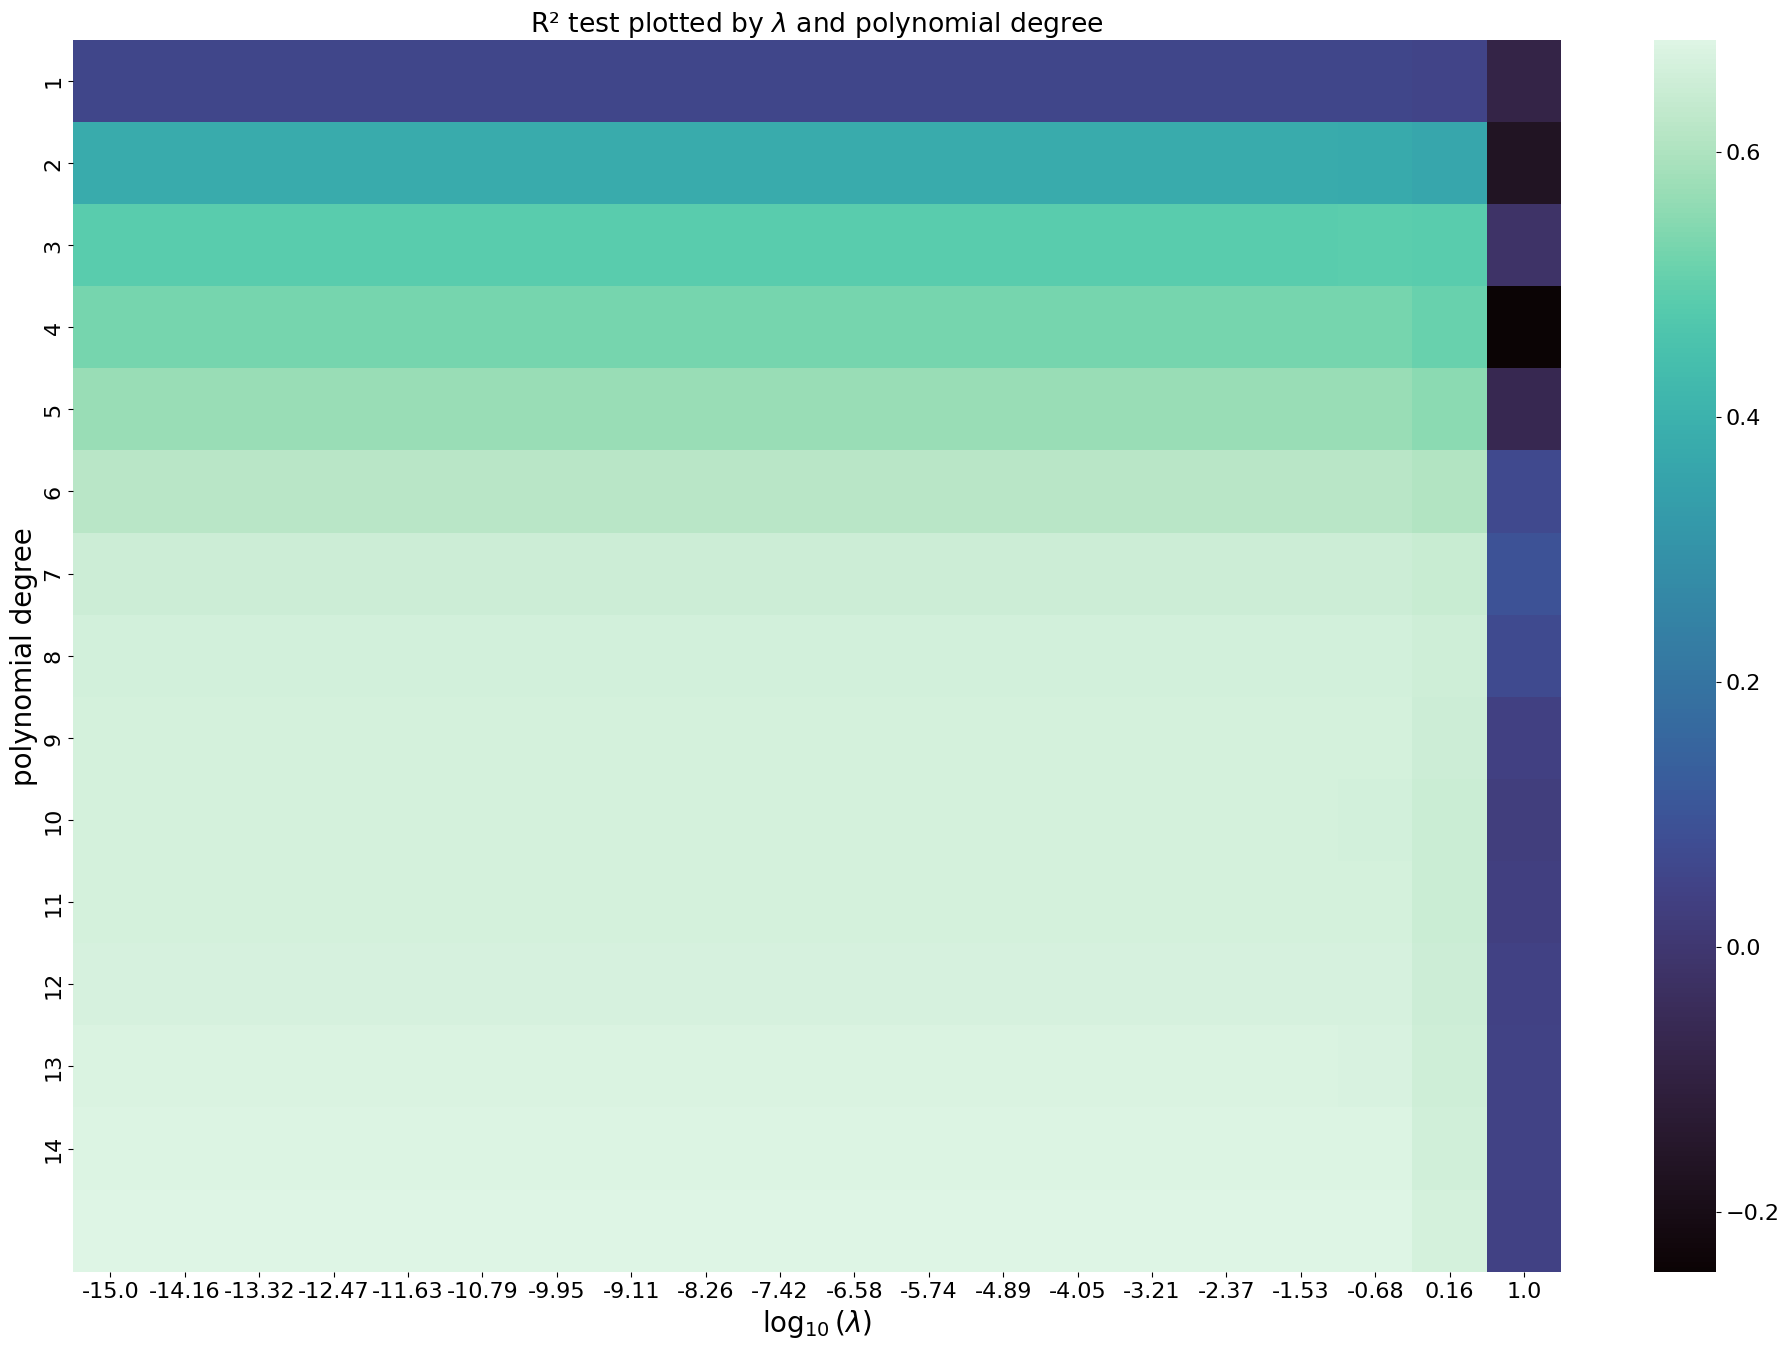

In [14]:
# --------------------------------- Plot results ---------------------------------
polynomial_degrees_list = list(range(1, max_degree))
plt.figure(figsize=(24, 16))
fig = sns.heatmap(r2_test_values_d, xticklabels=lambdas_labels, yticklabels=polynomial_degrees_list, cmap="mako")
fig.set(xlabel=r'$\log_{10}(\lambda)$', ylabel="polynomial degree", title="R² test plotted by "+r'$\lambda$'+" and polynomial degree")
plt.savefig("/Users/elisaottoboni/Desktop/Images/R2_test_heatmap_d2.pdf", format='pdf', bbox_inches='tight')
plt.show()

Degree: 1 	 MSE: 30984.2703 	 R²: 0.0176
Degree: 2 	 MSE: 12180.2685 	 R²: 0.6138
Degree: 3 	 MSE: 6028.3576 	 R²: 0.8089
Degree: 4 	 MSE: 5559.3163 	 R²: 0.8237
Degree: 5 	 MSE: 5356.6480 	 R²: 0.8302
Degree: 6 	 MSE: 5217.0385 	 R²: 0.8346
Degree: 7 	 MSE: 5047.3647 	 R²: 0.8400
Degree: 8 	 MSE: 4855.6938 	 R²: 0.8460
Degree: 9 	 MSE: 4630.7112 	 R²: 0.8532
Degree: 10 	 MSE: 4360.0346 	 R²: 0.8618
Degree: 11 	 MSE: 4082.3307 	 R²: 0.8706
Degree: 12 	 MSE: 3844.8535 	 R²: 0.8781
Degree: 13 	 MSE: 3674.9875 	 R²: 0.8835
Degree: 14 	 MSE: 3575.2589 	 R²: 0.8866
Degree: 15 	 MSE: 3528.5817 	 R²: 0.8881
Degree: 16 	 MSE: 3511.1543 	 R²: 0.8887
Degree: 17 	 MSE: 3503.4116 	 R²: 0.8889
Degree: 18 	 MSE: 3494.1737 	 R²: 0.8892
Degree: 19 	 MSE: 3479.8531 	 R²: 0.8897
Degree: 20 	 MSE: 3461.7321 	 R²: 0.8902
Degree: 21 	 MSE: 3442.9207 	 R²: 0.8908
Degree: 22 	 MSE: 3425.9315 	 R²: 0.8914
Degree: 23 	 MSE: 3411.5921 	 R²: 0.8918
Degree: 24 	 MSE: 3399.2978 	 R²: 0.8922
Degree: 25 	 MSE: 3387.

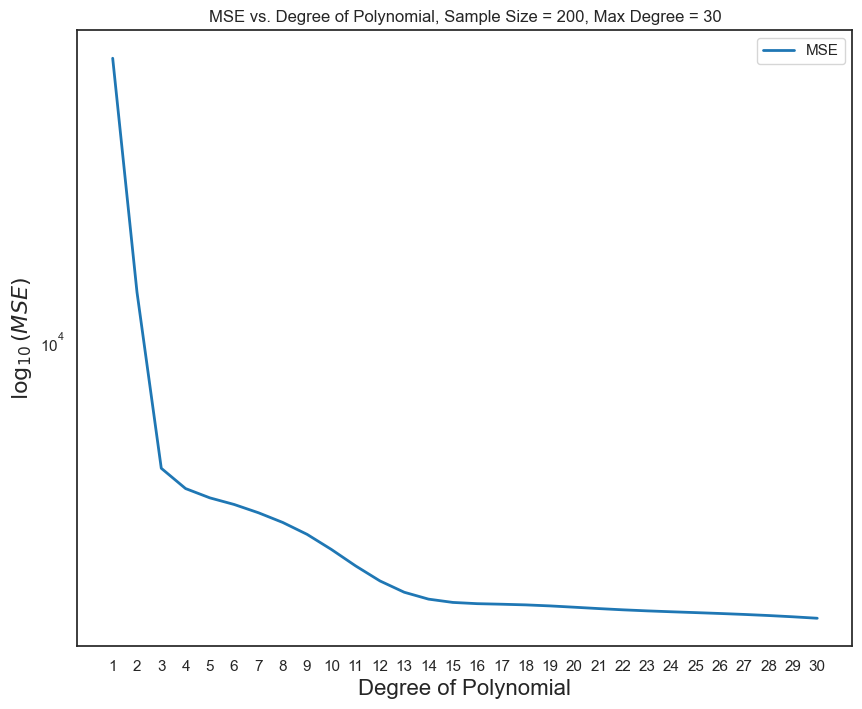

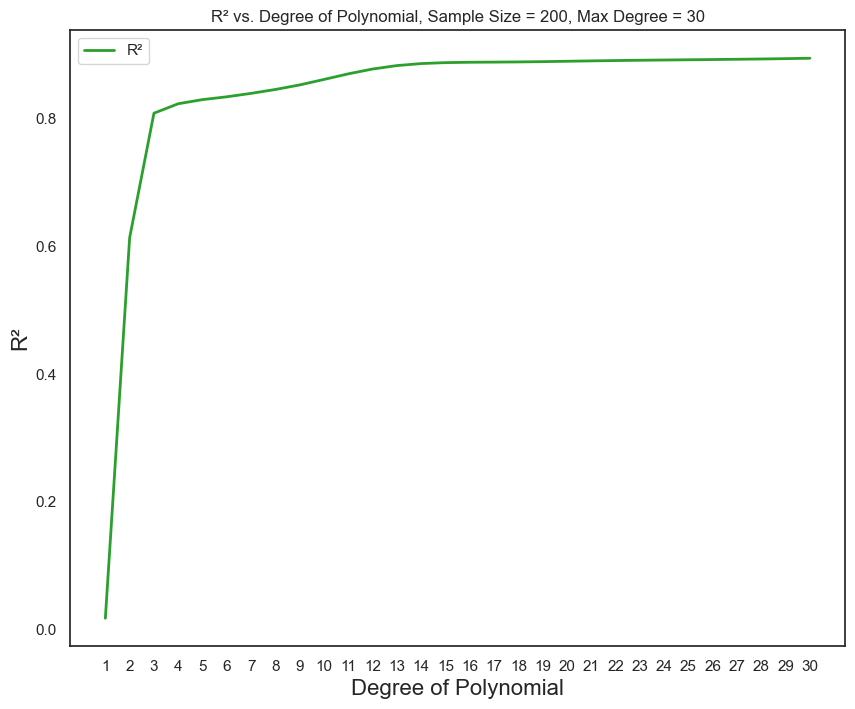

In [21]:
# Set random seed and sample size
np.random.seed(234)
n, m = terrain1.shape
sample_size = 200     # --> MODIFY THIS FOR TESTING
max_degree = 30       # --> MODIFY THIS FOR TESTING

# Select a random sample from the terrain data
start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)
terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]

# Create meshgrid for the sample
x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

# Reshape the sample into feature matrix and target vector
X = np.column_stack((x_sample.ravel(), y_sample.ravel()))
terrain_target = terrain_sample.ravel()

# Lists to store the metrics for different polynomial degrees
mse_values = []
r2_values = []

best_alpha = alpha ** 10

# Loop over polynomial degrees and fit model
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = Lasso(alpha = best_alpha, fit_intercept=False)
    model.fit(X_poly, terrain_target)
    y_pred = model.predict(X_poly)
    
    mse, r2 = mse_and_r2_sk(terrain_target, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)
    
    print(f"Degree: {degree} \t MSE: {mse:.4f} \t R²: {r2:.4f}")

# --------------------------------- Plot results ---------------------------------
sns.set_theme(style="white")

# MSE Plot
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), mse_values, label='MSE', color='tab:blue', linewidth=2)
plt.xlabel('Degree of Polynomial', fontsize=16)
plt.ylabel(r'$\log_{10}(MSE)$', fontsize=16)
plt.xticks(ticks=range(1, max_degree + 1))
plt.title(f'MSE vs. Degree of Polynomial, Sample Size = {sample_size}, Max Degree = {max_degree}', fontsize=12)
plt.yscale('log')
plt.legend()
plt.show()

# R² Plot
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), r2_values, label='R²', color='tab:green', linewidth=2)
plt.xlabel('Degree of Polynomial', fontsize=16)
plt.ylabel('R²', fontsize=16)
plt.xticks(ticks=range(1, max_degree + 1))
plt.title(f'R² vs. Degree of Polynomial, Sample Size = {sample_size}, Max Degree = {max_degree}', fontsize=12)
plt.legend()
plt.show()

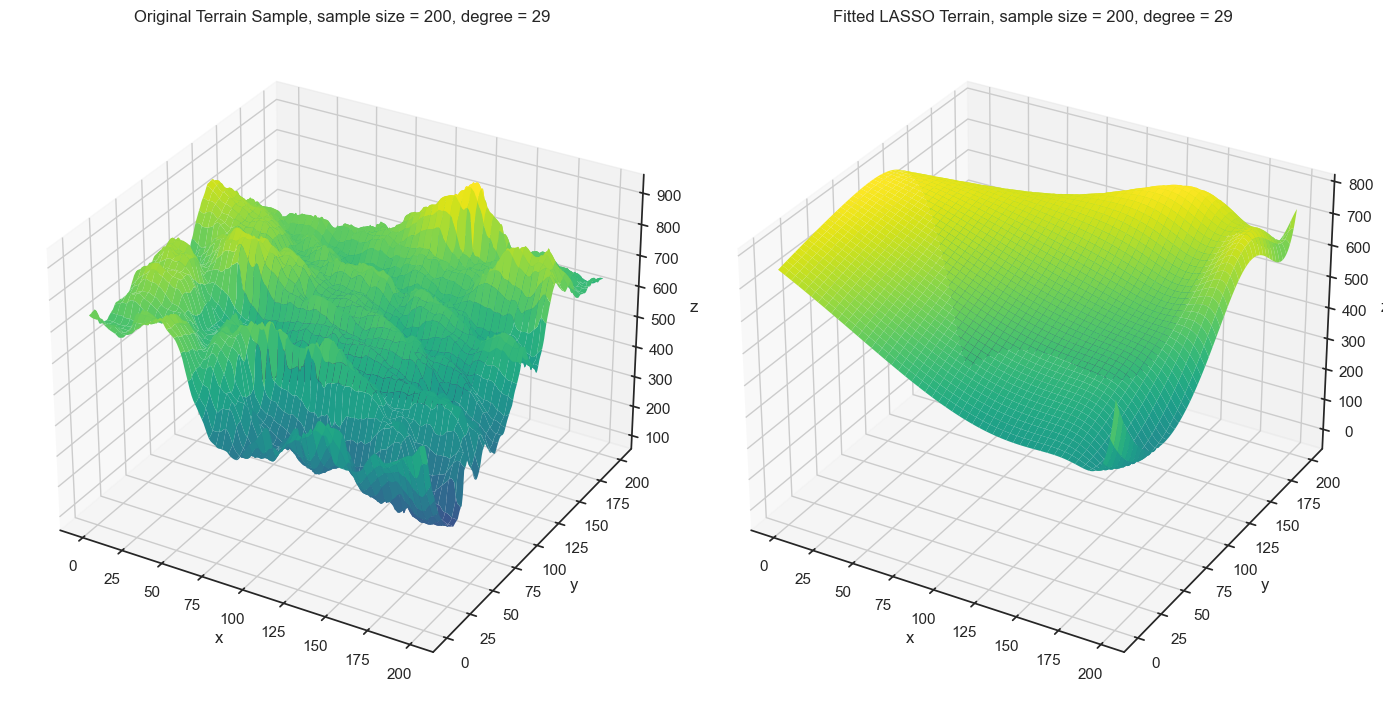

MSE: 3327.7057
R2: 0.8945


In [18]:
np.random.seed(234)
n, m = terrain1.shape

sample_size = 200        # --> MODIFY THIS FOR TESTING
degree = best_degree     # ––> MODIFY THIS FOR TESTING

start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)

terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]

x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

x_flat = x_sample.ravel()
y_flat = y_sample.ravel()
z_flat = terrain_sample.ravel()

X = np.column_stack((x_flat, y_flat))
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

model = Lasso(alpha = best_alpha, fit_intercept=False)
model.fit(X_poly, z_flat)
z_pred = model.predict(X_poly)
z_pred_reshaped = z_pred.reshape(terrain_sample.shape)

MSE_LASSO, R2_LASSO = mse_and_r2_sk(z_flat, z_pred)

# --------------------------------- Plot results ---------------------------------
fig = plt.figure(figsize=(14, 7))

# Original Terrain Plot
ax1 = fig.add_subplot(121, projection='3d')
surface1 = ax1.plot_surface(x_sample, y_sample, terrain_sample, cmap='viridis', edgecolor='none')
ax1.set_title(f'Original Terrain Sample, sample size = {sample_size}, degree = {degree}')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# Fitted Terrain Plot
ax2 = fig.add_subplot(122, projection='3d')
surface2 = ax2.plot_surface(x_sample, y_sample, z_pred_reshaped, cmap='viridis', edgecolor='none')
ax2.set_title(f'Fitted LASSO Terrain, sample size = {sample_size}, degree = {degree}')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
plt.tight_layout()
plt.show()

# Output the metrics
print(f'MSE: {MSE_LASSO:.4f}')
print(f"R2: {R2_LASSO:.4f}")

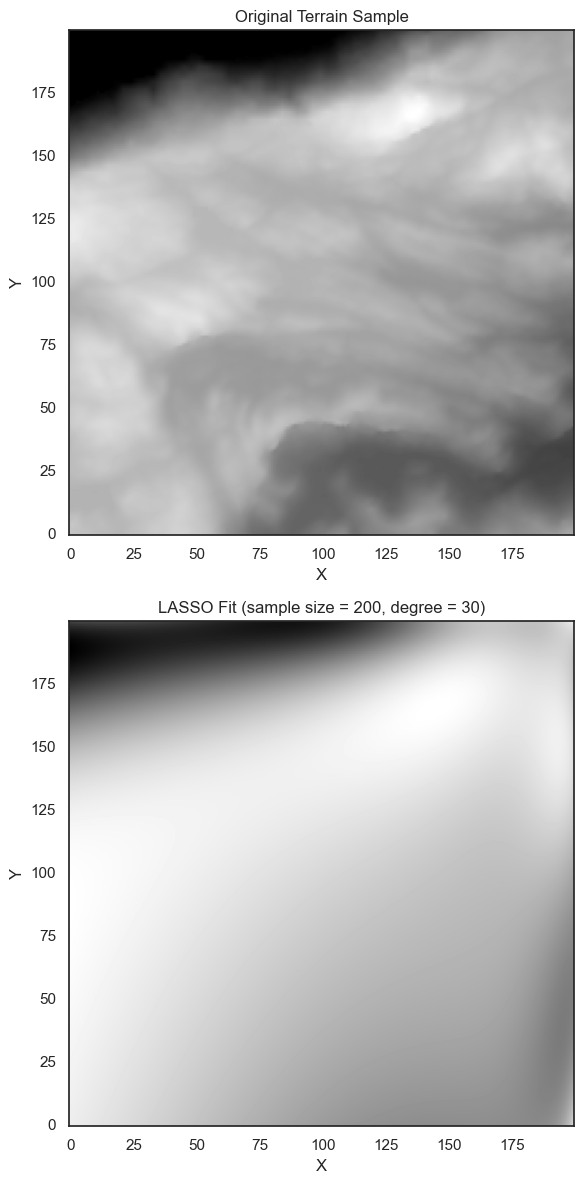

In [22]:
# Create subplots for the terrain plots
fig, ax = plt.subplots(2, 1, figsize=(6, 12))

# Original Terrain Plot
ax[0].imshow(terrain_sample, cmap='gray', origin='lower')
ax[0].set_title(f'Original Terrain Sample', fontsize=12)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

# Fitted Terrain Plot
ax[1].imshow(z_pred_reshaped, cmap='gray', origin='lower')
ax[1].set_title(f'LASSO Fit (sample size = {sample_size}, degree = {degree})', fontsize=12)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')

# Adjust the layout and show the plots
plt.tight_layout()
plt.savefig('/Users/elisaottoboni/Desktop/Images/terrain_analysis_Lasso.pdf')
plt.show()

### Bias-Variance Trade-off and bootstrap

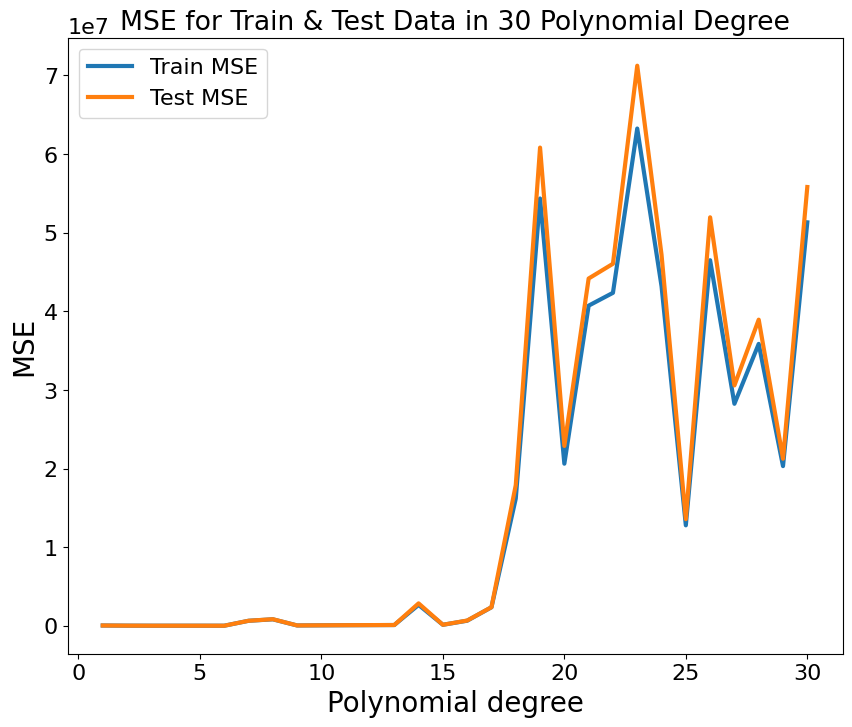

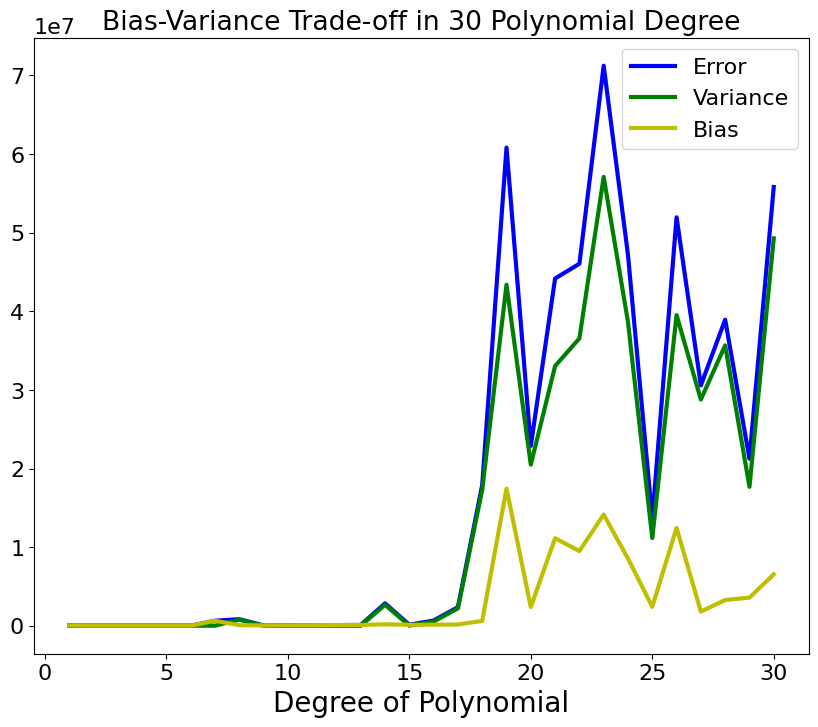

In [5]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

np.random.seed(234)
n, m = terrain1.shape

n_boostraps = 100
sample_size = 200         # --> MODIFY THIS FOR TESTING
max_degree = 30            # ––> MODIFY THIS FOR TESTING
lambdas = np.logspace(-5, 5, max_degree) 

start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)

terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]

# meshgrid
x_sample = np.linspace(0, sample_size - 1, sample_size)
y_sample = np.linspace(0, sample_size - 1, sample_size)
x_sample, y_sample = np.meshgrid(x_sample, y_sample)

X = np.column_stack((x_sample.ravel(), y_sample.ravel()))
terrain_target = terrain_sample.ravel()

MSE_train_values = np.zeros(max_degree)
MSE_test_values = np.zeros(max_degree)
error = np.zeros(max_degree)
bias = np.zeros(max_degree)
variance = np.zeros(max_degree)

X_train, X_test, y_train, y_test = train_test_split(X, terrain_target, test_size=0.2, random_state=10)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

for degree in range(1, max_degree + 1):
    model = make_pipeline(PolynomialFeatures(degree = degree), LinearRegression(fit_intercept = False))
    y_train_pred = np.empty((y_train.shape[0], n_boostraps))
    y_test_pred = np.empty((y_test.shape[0], n_boostraps))

    for j in range(n_boostraps):
        new_x_, new_z_ = resample(X_train, y_train)
        model.fit(new_x_, new_z_)
        y_train_pred[:, j] = model.predict(X_train).ravel()
        y_test_pred[:, j] = model.predict(X_test).ravel()

    error[degree - 1] = np.mean(np.mean((y_test - y_test_pred)**2, axis=1, keepdims=True))
    bias[degree - 1] = np.mean((y_test - np.mean(y_test_pred, axis=1, keepdims=True))**2)
    variance[degree - 1] = np.mean(np.var(y_test_pred, axis=1, keepdims=True))
    
    MSE_train_values[degree - 1] = MSE(y_train, y_train_pred)
    MSE_test_values[degree - 1] = MSE(y_test, y_test_pred)

# --------------------------------- Plot results ---------------------------------
plt.rcParams.update({
    "font.size": 16,             
    "axes.labelsize": 20,        
    "xtick.labelsize": 16,       
    "ytick.labelsize": 16,       
    "legend.fontsize": 16,       
    "lines.linewidth": 3,        
})

plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), MSE_train_values, label='Train MSE')
plt.plot(range(1, max_degree + 1), MSE_test_values, label='Test MSE')
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.title(f'MSE for Train & Test Data in {max_degree} Polynomial Degree')
plt.legend()
plt.savefig("mse_r2_BVOF_GD.pdf", format='pdf', bbox_inches='tight')

plt.figure(figsize=(10, 8))
plt.plot(range(1, max_degree + 1), error, 'b', label='Error')
plt.plot(range(1, max_degree + 1), variance, 'g', label='Variance')
plt.plot(range(1, max_degree + 1), bias, 'y', label='Bias')
plt.xlabel("Degree of Polynomial")
plt.title(f'Bias-Variance Trade-off in {max_degree} Polynomial Degree')
plt.legend()
plt.savefig("BVOF_GD.pdf", format='pdf', bbox_inches='tight')
plt.show()

## Cross-validation analysis

Optimized code for cross-validation. We reduced the complexity of our analysis by decreasing the sample size, the polynomial degrees and the number of lambas taken into account.

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
from sklearn.exceptions import ConvergenceWarning
from imageio import imread
from joblib import parallel_backend

# Load the terrain data
terrain1 = imread('Raw_Data/SRTM_data_Norway_1.tif')
n, m = terrain1.shape
np.random.seed(234)

# Parameters for the sample size and polynomial degree
sample_size = 100  # Reduced from 200 to 100
start_x = np.random.randint(0, m - sample_size)
start_y = np.random.randint(0, n - sample_size)
terrain_sample = terrain1[start_y:start_y + sample_size, start_x:start_x + sample_size]

# Generate the meshgrid for the sample
x_sample, y_sample = np.meshgrid(np.linspace(0, sample_size - 1, sample_size), np.linspace(0, sample_size - 1, sample_size))

# Flatten the meshgrid and sample for regression
X = np.column_stack((x_sample.ravel(), y_sample.ravel()))
z_flat = terrain_sample.ravel()  # Dependent variable (elevation)

# Define parameters
polynomial_degrees_list = list(range(1, 11))  # Reduced max degree
lambda_values_list = np.logspace(-6, 6, 20)  # Adjusted range and reduced number of values

# Initialize matrices to store MSE values
mse_ols_values = np.zeros(len(polynomial_degrees_list))
mse_ridge_values = np.zeros(len(polynomial_degrees_list))
mse_lasso_values = np.zeros(len(polynomial_degrees_list))

# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Precompute polynomial features
poly_features = {}
for degree in polynomial_degrees_list:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features[degree] = poly.fit_transform(X)

# GridSearchCV for all models
for i, degree in enumerate(polynomial_degrees_list):
    X_poly = poly_features[degree]
    
    # OLS
    ols_pipeline = make_pipeline(StandardScaler(), LinearRegression())
    with parallel_backend('threading', n_jobs=-1):
        grid_search = GridSearchCV(ols_pipeline, {}, cv=kf, scoring='neg_mean_squared_error')
        grid_search.fit(X_poly, z_flat)
    mse_ols_values[i] = -grid_search.best_score_
    
    # Ridge
    ridge_pipeline = make_pipeline(StandardScaler(), Ridge())
    param_grid = {'ridge__alpha': lambda_values_list}
    with parallel_backend('threading', n_jobs=-1):
        grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error')
        grid_search.fit(X_poly, z_flat)
    mse_ridge_values[i] = -grid_search.best_score_
    
    # Lasso
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        lasso_pipeline = make_pipeline(StandardScaler(), Lasso(max_iter=10000, tol=1e-4))  # Removed early_stopping
        param_grid = {'lasso__alpha': lambda_values_list}
        with parallel_backend('threading', n_jobs=-1):
            grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error')
            grid_search.fit(X_poly, z_flat)
        mse_lasso_values[i] = -grid_search.best_score_

# Print results
for i, degree in enumerate(polynomial_degrees_list):
    print(f'Degree: {degree}')
    print(f'OLS MSE: {mse_ols_values[i]:.4f}')
    print(f'Ridge MSE: {mse_ridge_values[i]:.4f}')
    print(f'Lasso MSE: {mse_lasso_values[i]:.4f}')
    print()

Degree: 1
OLS MSE: 3775.8126
Ridge MSE: 3775.8123
Lasso MSE: 3775.8126

Degree: 2
OLS MSE: 2810.6685
Ridge MSE: 2810.6678
Lasso MSE: 2810.6685

Degree: 3
OLS MSE: 2534.8943
Ridge MSE: 2534.8902
Lasso MSE: 2534.8930

Degree: 4
OLS MSE: 1905.1026
Ridge MSE: 1905.0701
Lasso MSE: 1924.6263

Degree: 5
OLS MSE: 1569.2523
Ridge MSE: 1569.2478
Lasso MSE: 1707.7618

Degree: 6
OLS MSE: 910.3658
Ridge MSE: 910.3642
Lasso MSE: 1540.8864

Degree: 7
OLS MSE: 743.0764
Ridge MSE: 743.1244
Lasso MSE: 1265.2173

Degree: 8
OLS MSE: 577.3148
Ridge MSE: 602.1495
Lasso MSE: 1067.1448

Degree: 9
OLS MSE: 423.4075
Ridge MSE: 530.9390
Lasso MSE: 1019.5432

Degree: 10
OLS MSE: 400.8394
Ridge MSE: 451.9063
Lasso MSE: 1014.6949

